In [1]:
#dataset do kaggle: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Carregar a base de dados
reviews_df = pd.read_csv('/content/amazon_alexa.tsv', sep = '\t')

In [3]:
#Tamanho -> (quantidade de linhas, quantidade de colunas)
reviews_df.shape

(3150, 5)

In [4]:
#Visão geral do dataset
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
#Informações sobre os tipos de dados
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
#Estatística gerada para os atributos numéricos
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
#Coluna dos textos
reviews_df['verified_reviews']

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home."
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."
4,Music
5,"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do."
6,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use. It IS a great alarm. If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response. She does not seem to be very smartbon politics yet."
7,I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.
8,looks great
9,"Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!"


<Axes: >

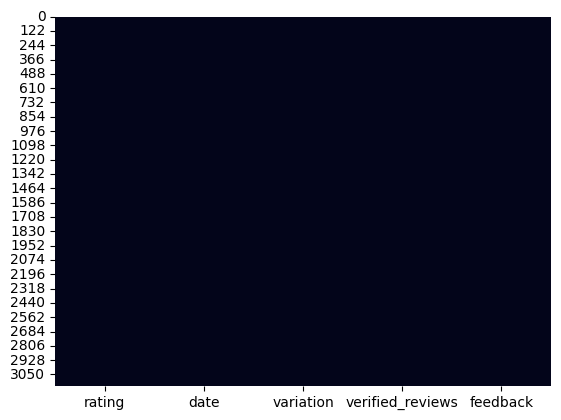

In [8]:
#Exploração dos dados com o método .headmap da biblioteca seaborn
sns.heatmap(reviews_df.isnull(), cbar=False)

In [9]:
#Visualizar para ter certeza que não tem nenhum valor nulo
reviews_df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

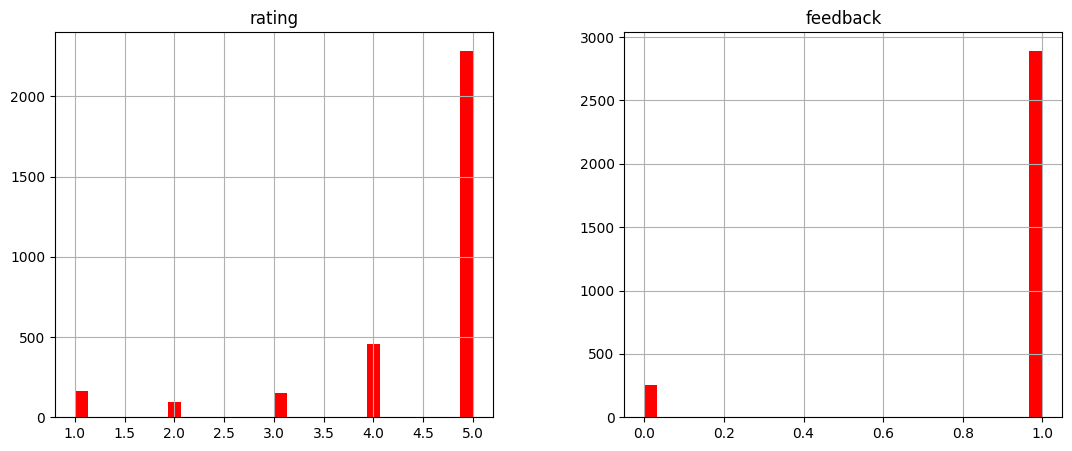

In [10]:
#Criar histogramas para visualizar
reviews_df.hist(bins = 30, figsize=(13,5), color = 'r')

In [11]:
#Percorrer todos os textos para verificar o tamanho da string
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].astype(str)
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


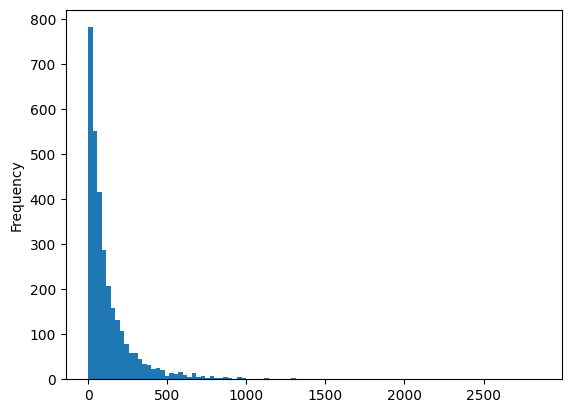

In [12]:
#Histograma do tamanho dos comentários
reviews_df['length'].plot(bins = 100, kind = 'hist');

In [13]:
#Mais informações sobre a frequência de comentários
reviews_df.length.describe()

,length
count,3150.000000
mean,132.049206
std,182.100176
min,1.000000
25%,30.000000
50%,74.000000
75%,165.000000
max,2851.000000


In [14]:
#Ver o maior review
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [15]:
#Ver o menor review
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [16]:
#Ver a média dos reviews
reviews_df[reviews_df['length'] == 131]['verified_reviews'].iloc[0]

'Never had ANY issue with buying use electronics as long as I get the GOOD or LIKE NEW. Just read the comment to see why it is used.'

In [17]:
#Reviews somente positivos
positive = reviews_df[reviews_df['feedback'] == 1]

In [18]:
#Visualização dessa tabela gerada
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [19]:
#Mais dados sobre essa tabela
positive.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


In [20]:
#O mesmo processo para os reviews negativos, a média de escrita é maior para quem vai falar mal
negative = reviews_df[reviews_df['feedback'] == 0]
#negative
#negative.describe()

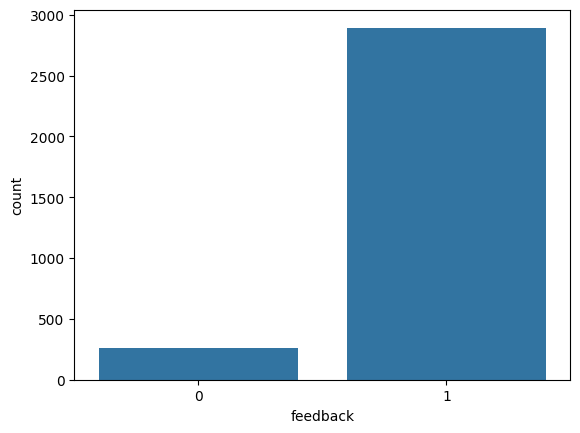

In [21]:
#Gráfico do feedback
#Esse comando aqui não ficou bom -> sns.countplot(reviews_df['feedback']);
sns.countplot(x='feedback', data=reviews_df)
plt.show()

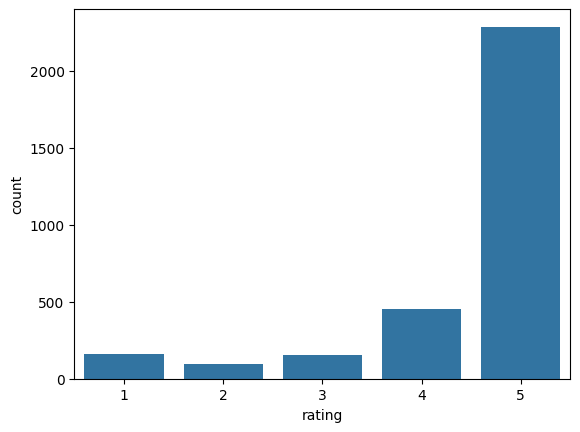

In [22]:
#Gráfico de rating
sns.countplot(x = 'rating', data = reviews_df);

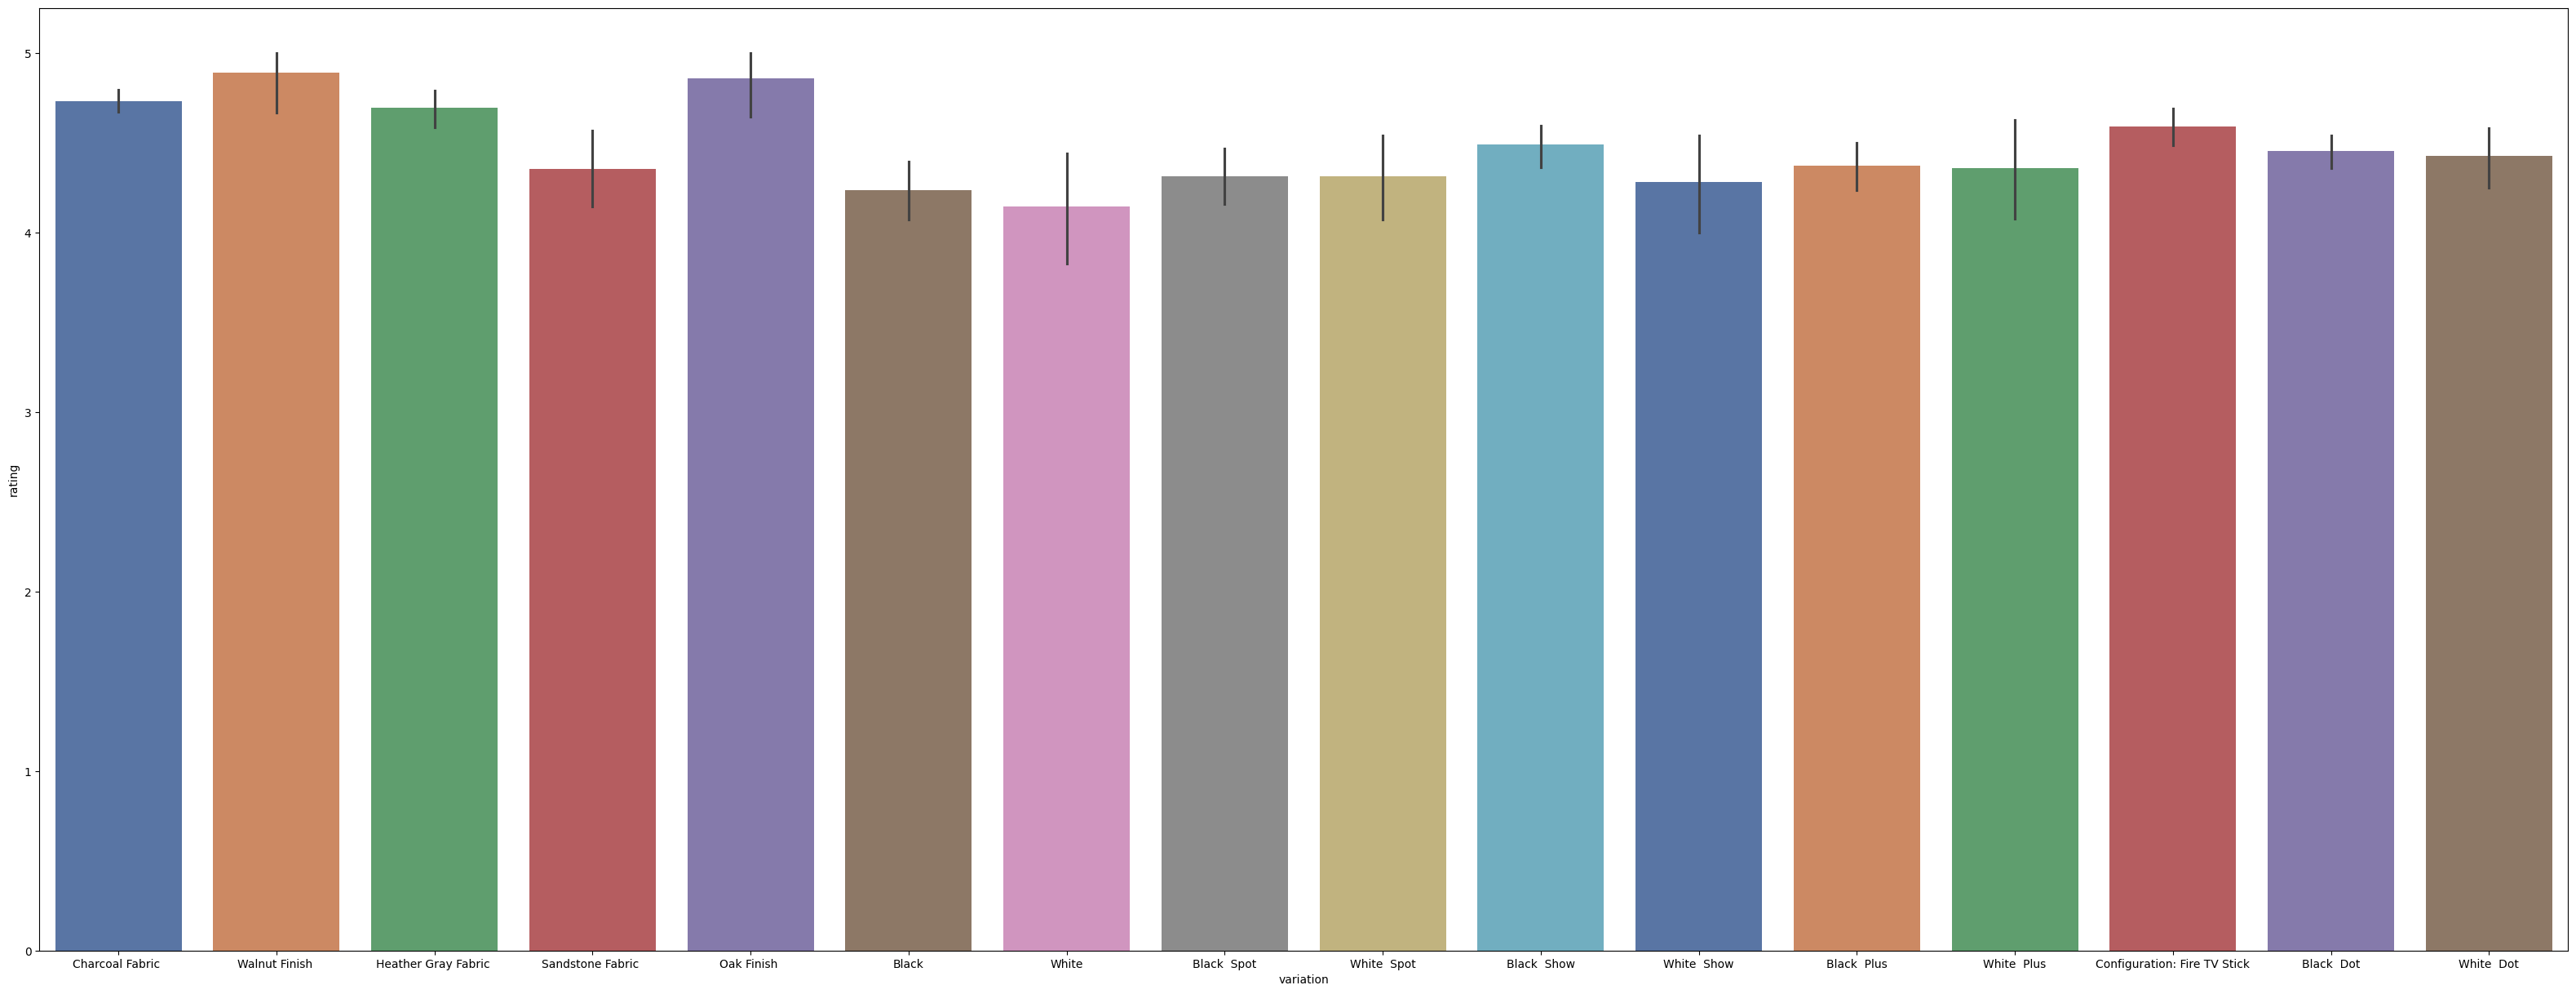

In [23]:
#Gráfico das cores escolhidas do produto
plt.figure(figsize = (40,15))
#Esse aqui não ficou legal -> sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep');
sns.barplot(x='variation', y='rating', hue='variation', data=reviews_df, palette='deep', dodge=False)
plt.legend([],[], frameon=False)
plt.show()

In [24]:
#Fazer uma lista de todas as palavras
sentences = reviews_df['verified_reviews'].tolist()

In [25]:
#Verificar a quantidade de respostas (reviews)
len(sentences)

3150

In [26]:
#Verificar as 10 primeiras sentenças
print(sentences[0:10])

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [27]:
#Agrupar em somente uma string todos os reviews
sentences_as_one_string = ' '.join(sentences)

In [28]:
#Amostra gerada
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [29]:
#Quantidade total de caracteres, necessário para depois sabermos quais termos são mais frequentes
len(sentences_as_one_string)

419104

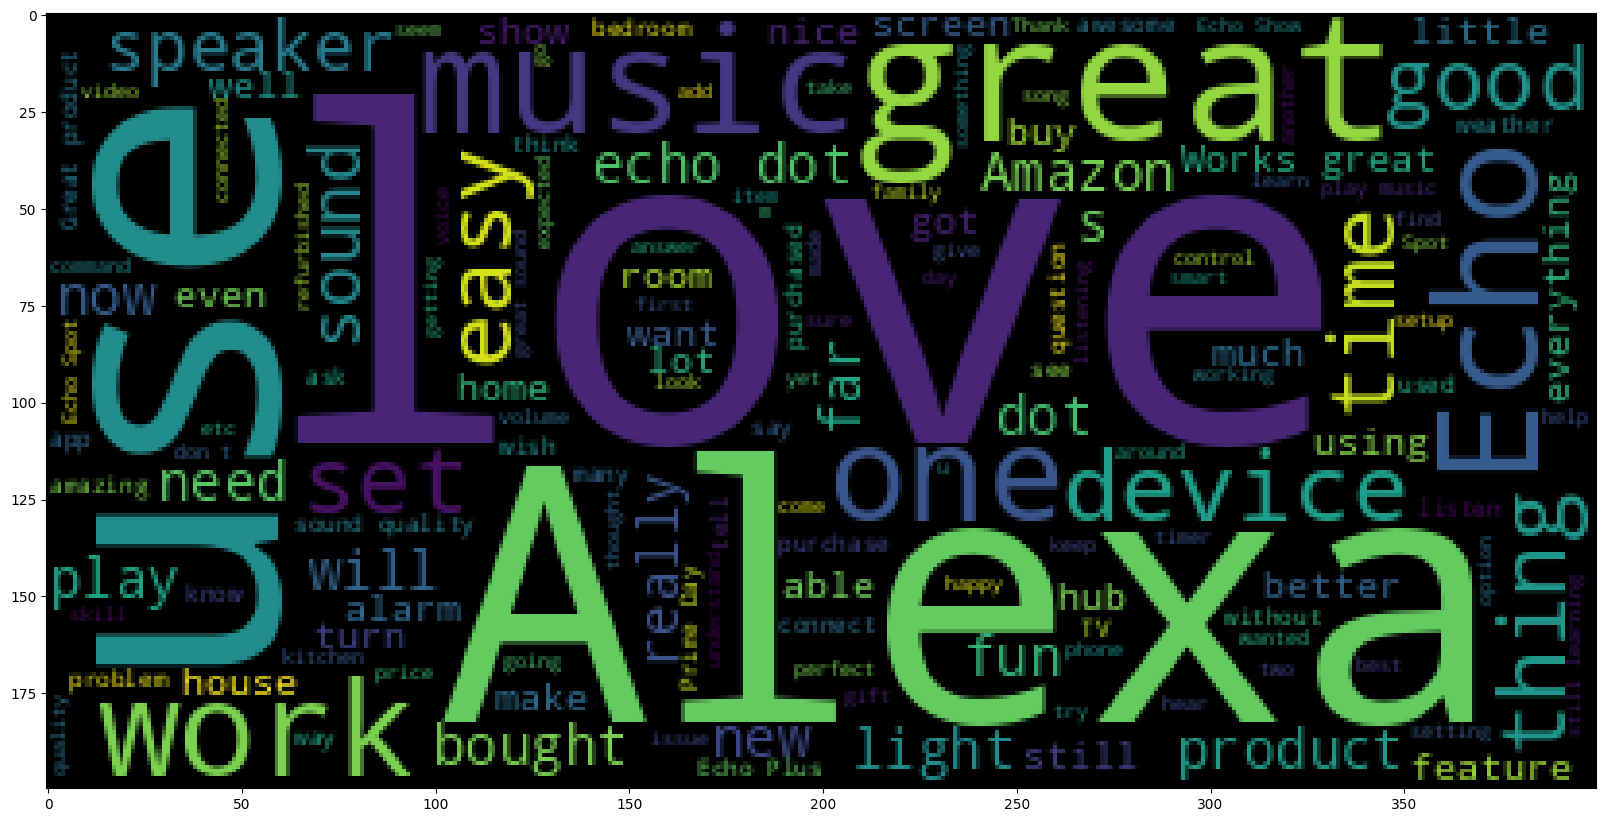

In [30]:
#Criar nuvem de palavras
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string));

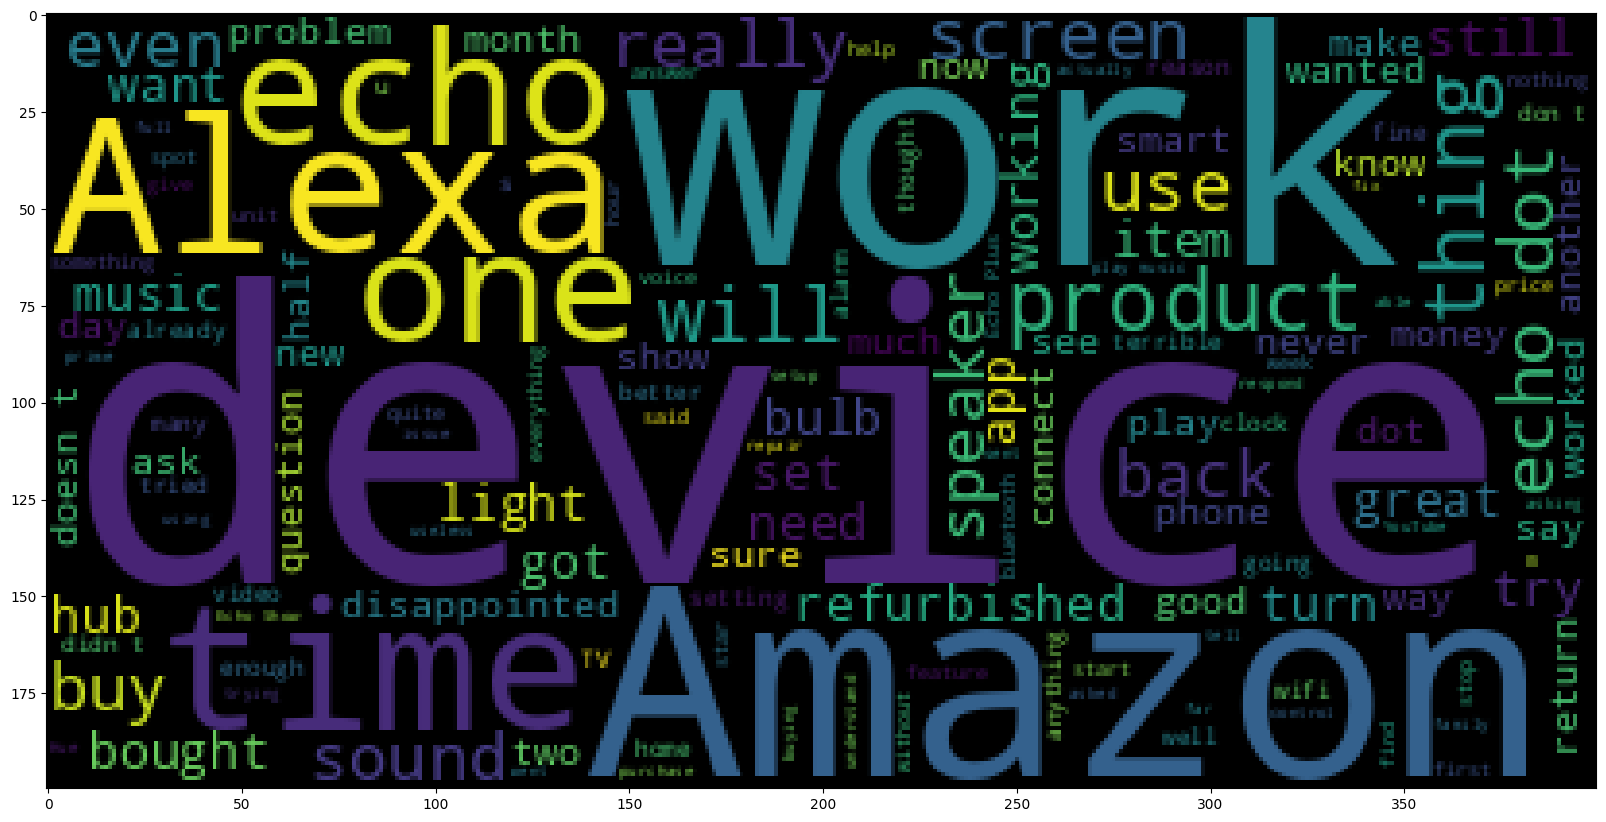

In [31]:
#Agora fazendo e mesmo mas somente para a nuvem de palavras considerando os reviews negativos
negative_list = negative['verified_reviews'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)
#len(negative_sentences_as_one_string)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string));

In [32]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [33]:
#Pontuações
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#Teste para remover pontuações
test = 'Sometimes, while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

In [35]:
#Nova variável sem pontuações
test_punc_removed = [char for char in test if char not in string.punctuation]

In [36]:
#Print dessa nova variável, cada caractere separado
print(test_punc_removed)

['S', 'o', 'm', 'e', 't', 'i', 'm', 'e', 's', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'p', 'l', 'a', 'y', 'i', 'n', 'g', ' ', 'a', ' ', 'g', 'a', 'm', 'e', ' ', 'y', 'o', 'u', ' ', 'c', 'a', 'n', ' ', 'a', 'n', 's', 'w', 'e', 'r', ' ', 'a', ' ', 'q', 'u', 'e', 's', 't', 'i', 'o', 'n', ' ', 'c', 'o', 'r', 'r', 'e', 'c', 't', 'l', 'y', ' ', 'b', 'u', 't', ' ', 'A', 'l', 'e', 'x', 'a', ' ', 's', 'a', 'y', 's', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 't', ' ', 'i', 't', ' ', 'w', 'r', 'o', 'n', 'g', ' ', 'a', 'n', 'd', ' ', 'a', 'n', 's', 'w', 'e', 'r', 's', ' ', 't', 'h', 'e', ' ', 's', 'a', 'm', 'e', ' ', 'a', 's', ' ', 'y', 'o', 'u', ' ', ' ', 'I', ' ', 'l', 'i', 'k', 'e', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'a', 'b', 'l', 'e', ' ', 't', 'o', ' ', 't', 'u', 'r', 'n', ' ', 'l', 'i', 'g', 'h', 't', 's', ' ', 'o', 'n', ' ', 'a', 'n', 'd', ' ', 'o', 'f', 'f', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'a', 'w', 'a', 'y', ' ', 'f', 'r', 'o', 'm', ' ', 'h', 'o', 'm', 'e']


In [37]:
#Juntar a variável com espaço entre os caracteres
test_punc_removed = ' '.join(test_punc_removed)


In [38]:
test_punc_removed

'S o m e t i m e s   w h i l e   p l a y i n g   a   g a m e   y o u   c a n   a n s w e r   a   q u e s t i o n   c o r r e c t l y   b u t   A l e x a   s a y s   y o u   g o t   i t   w r o n g   a n d   a n s w e r s   t h e   s a m e   a s   y o u     I   l i k e   b e i n g   a b l e   t o   t u r n   l i g h t s   o n   a n d   o f f   w h i l e   a w a y   f r o m   h o m e'

In [39]:
#Assim fica sem espaço entre os caracteres de uma palavra
test = 'Sometimes, while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'
test_punc_removed = ''.join(char for char in test if char not in string.punctuation)

words = test_punc_removed.split()
cleaned_words = [''.join(word.split()) for word in words]
final_string = ' '.join(cleaned_words)

test_punc_removed

'Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home'

In [40]:
#Selecionar stop words, palavras que não representam significância para definir emoções e sentimentos
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
#Quantidade de palavras stop words em inglês
len(stopwords.words('english'))

179

In [42]:
#Quantidade de palavras stop words em português
len(stopwords.words('portuguese'))

207

In [43]:
test_punc_removed

'Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home'

In [44]:
print(test_punc_removed.split())

['Sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'Alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', 'I', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home']


In [45]:
test_punc_stop_removed = [word for word in test_punc_removed.split() if word.lower() not in stopwords.words('english')]

In [46]:
test_punc_stop_removed

['Sometimes',
 'playing',
 'game',
 'answer',
 'question',
 'correctly',
 'Alexa',
 'says',
 'got',
 'wrong',
 'answers',
 'like',
 'able',
 'turn',
 'lights',
 'away',
 'home']

Tokenização (Count Vectorizer)
- Transformar letras em números;
- Cria uma lista de colunas únicas de palavras contando suas frequÇencia na frase;
- Isso gera uma matriz que então é usada na aprendizagem de máquina;

In [47]:
#Tokenização - Teste
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.', 'This document is the second documment.', 'And this is the third one.', 'Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [48]:
#Palavras selecionadas
print(vectorizer.get_feature_names_out())

['and' 'document' 'documment' 'first' 'is' 'one' 'second' 'the' 'third'
 'this']


In [49]:
#Matriz gerada
print(X.toarray())

[[0 1 0 1 1 0 0 1 0 1]
 [0 1 1 0 1 0 1 1 0 1]
 [1 0 0 0 1 1 0 1 1 1]
 [0 1 0 1 1 0 0 1 0 1]]


In [50]:
#Função para limpar o review
def message_cleaning(message):
  text = [char for char in message if char not in string.punctuation]
  text = ''.join(text)
  text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
  return text

In [51]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [52]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [53]:
print(reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [54]:
reviews_df_clean

,verified_reviews
0,"[Love, Echo]"
1,[Loved]
2,"[Sometimes, playing, game, answer, question, correctly, Alexa, says, got, wrong, answers, like, able, turn, lights, away, home]"
3,"[lot, fun, thing, 4, yr, old, learns, dinosaurs, control, lights, play, games, like, categories, nice, sound, playing, music, well]"
4,[Music]
5,"[received, echo, gift, needed, another, Bluetooth, something, play, music, easily, accessible, found, smart, speaker, Can’t, wait, see, else]"
6,"[Without, cellphone, cannot, use, many, features, iPad, see, use, great, alarm, u, r, almost, deaf, hear, alarm, bedroom, living, room, reason, enough, keep, herIt, fun, ask, random, questions, hear, response, seem, smartbon, politics, yet]"
7,"[think, 5th, one, Ive, purchased, Im, working, getting, one, every, room, house, really, like, features, offer, specifily, playing, music, Echos, controlling, lights, throughout, house]"
8,"[looks, great]"
9,"[Love, I’ve, listened, songs, haven’t, heard, since, childhood, get, news, weather, information, It’s, great]"


In [55]:
#Transforma textos em números com vectorizer
from sklearn.feature_extraction.text import CountVectorizer
#Remoção de pontos e de stop words
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [56]:
#Seleção dos textos únicos
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [57]:
#Quantidade de palavras, igual ao número de colunas da matrix gerada
len(vectorizer.get_feature_names_out())

5212

In [58]:
#Mostrar a matrix gerada
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [59]:
reviews_df.drop(['verified_reviews'], axis = 1, inplace=True)

In [60]:
# (Reviews, Colunas)
reviews_countvectorizer.shape

(3150, 5212)

In [61]:
#Data frame utilizado para o treinamento
reviews_df

,rating,date,variation,feedback,length
0,5,31-Jul-18,Charcoal Fabric,1,13
1,5,31-Jul-18,Charcoal Fabric,1,9
2,4,31-Jul-18,Walnut Finish,1,195
3,5,31-Jul-18,Charcoal Fabric,1,172
4,5,31-Jul-18,Charcoal Fabric,1,5
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,1,50
3146,5,30-Jul-18,Black Dot,1,135
3147,5,30-Jul-18,Black Dot,1,441
3148,5,30-Jul-18,White Dot,1,380


In [62]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis = 1)

In [63]:
reviews_df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [64]:
X_cat = reviews_df[['variation']]
X_cat

,variation
0,Charcoal Fabric
1,Charcoal Fabric
2,Walnut Finish
3,Charcoal Fabric
4,Charcoal Fabric
...,...
3145,Black Dot
3146,Black Dot
3147,Black Dot
3148,White Dot


In [65]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
reviews_df.drop(['variation'], axis = 1, inplace = True)
reviews_df = pd.concat([reviews_df, X_cat], axis = 1)

In [66]:
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
type(reviews_countvectorizer)

scipy.sparse._csr.csr_matrix

In [68]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
type(reviews)

pandas.core.frame.DataFrame

In [69]:
reviews_df = pd.concat([reviews_df, reviews], axis = 1)

In [70]:
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Variável X que terá os atributos previsores
X = reviews_df.drop(['feedback'], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#Variável Y que terá as classes
Y = reviews_df['feedback']
Y

,feedback
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Intuição sobre o algoritmo Naïve Bayes:
- o Naïve Bayes é um algortimo de classificação baseado no teorema de Bayes;
- lê-se neivi beis;
- eficiente para classificação de textos;
- passos:

  1. Probabilidades a priori

      Caso analisado / Total de casos

  2. Likehood
  
      Considerar a vizinhança

      Probabilidade de pertencer a uma classe dependendo da sua zinhança

  3. Probabilidade porteriori

      Probabilidade priori * likehood

      Compara essas probabilidades, a maior vence


In [73]:
#Seleção para treinamento, com 20% dos dados para testes
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [74]:
#Verificação do tamanho da amostra de dados para treino e testes
X_train.shape, X_test.shape

((2520, 5228), (630, 5228))

In [75]:
 #Para estudar mais sobre algoritmos Naïve Bayes: https://iaexpert.academy/2019/04/24/tipos-de-metodos-naive-bayes/

In [76]:
#Um método baseado no algoritmo Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, Y_train)

MultinomialNB()

In [77]:
#Análise dos dados
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [78]:
Y_pred = naive_bayes.predict(X_test)

In [79]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [80]:
Y_test

,feedback
2474,1
778,1
3044,1
1678,0
1254,1
1925,1
1045,1
798,1
638,1
58,1


In [81]:
#Percentual de acerto
#Considera todas as classes participantes do treinamento (reviews negativo e positivo)
accuracy_score(Y_test, Y_pred)

0.9380952380952381

In [82]:
#Lembrando que a base de dados está desbalanceada (tem mais reviews positivos que negativos)
#Por isso o uso da matriz de confusão
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 15,  29],
       [ 10, 576]])

<Axes: >

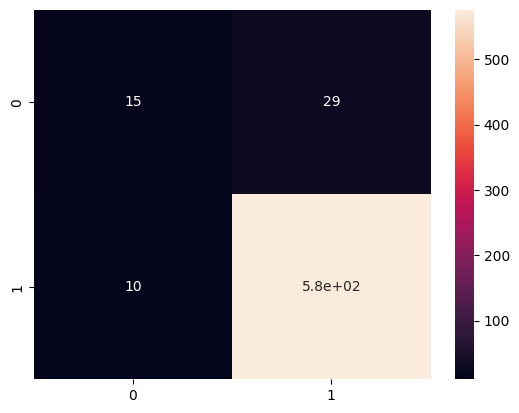

In [83]:
#Coordenadas: reviews
#Abscissa: classificação realizada do review
sns.heatmap(cm, annot=True)

In [84]:
#Com esse print, percebe-se que a precisão de identificar reviews negativos (valor 0) e valores poritvos (valor 1)
#Com essa base de dados desbalanceada, é importante analisar a coluna f1-score
#Precision = precisão ao analisar os dados
#Recall = eficiência em identificar se um review é positivo ou negativo
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.34      0.43        44
           1       0.95      0.98      0.97       586

    accuracy                           0.94       630
   macro avg       0.78      0.66      0.70       630
weighted avg       0.93      0.94      0.93       630



In [85]:
#Treinamento por regressão logística
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

LogisticRegression()

In [86]:
Y_pred = logistic.predict(X_test)

In [87]:
accuracy_score(Y_test, Y_pred)

0.9396825396825397

In [88]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.25      0.37        44
           1       0.95      0.99      0.97       586

    accuracy                           0.94       630
   macro avg       0.82      0.62      0.67       630
weighted avg       0.93      0.94      0.93       630



Com o algoritmo de regressão logística, percebe-se que a precisão de classificar os reviews como negativos possui a precisão de 79%

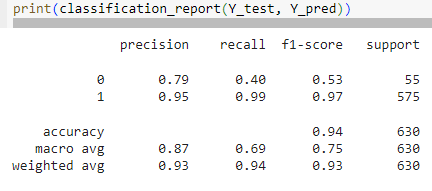

In [89]:
#Classificando uma frase
import pickle

In [90]:
with open('text_classifier.pkl', 'wb') as f:
  pickle.dump([naive_bayes, onehotencoder, vectorizer], f)

In [91]:
with open('text_classifier.pkl', 'rb') as f:
  bayes, onehot, vec = pickle.load(f)

In [92]:
bayes

MultinomialNB()

In [93]:
onehot

OneHotEncoder()

In [94]:
vec

CountVectorizer(analyzer=<function message_cleaning at 0x7f20e717b640>)

In [95]:
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [96]:
#Pegando um review qualquer para testar um review a ser categorizado
negative_text = negative.iloc[0:1, [2,3]]
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [97]:
X_cat = negative_text[['variation']]
X_cat

,variation
46,Charcoal Fabric


In [98]:
X_cat = onehot.transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [100]:
#Para dizer que os índices são iguais
X_cat.index = negative_text.index
X_cat.index, negative_text.index

(Index([46], dtype='int64'), Index([46], dtype='int64'))

In [101]:
negative_df = pd.concat([negative_text, X_cat], axis = 1)
negative_df

,variation,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
#Agora apagando o variation
negative_df.drop(['variation'], axis = 1, inplace = True)
negative_df

,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
#Processando o review
negative_coutvectorizer = vec.transform(negative_df['verified_reviews'])

In [104]:
#Visualizar
negative_coutvectorizer

<1x5212 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [105]:
review = pd.DataFrame(negative_coutvectorizer.toarray())
review

,0,1,2,3,4,5,6,7,8,9,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
negative_df.drop(['verified_reviews'], axis = 1, inplace = True)
negative_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
negative_df.index = review.index

In [108]:
negative_final = pd.concat([negative_df, review], axis = 1)
negative_final

,0,1,2,3,4,5,6,7,8,9,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#Verificar se qualifica corretamente como review negativo (valor 0)
bayes.predict(negative_final)

array([0])

In [110]:
#Probabilidade de estar certo
bayes.predict_proba(negative_final)

array([[0.8027966, 0.1972034]])